## Evaluations with baseline clustering methods
This notebook shows the baselines that we use to compare the bias-aware clustering experiment with.
We have two conditions:

1. KMeans without errors as attribute
The number of clusters will be determined with the Silhouette coefficient and elbow method

2. KMeans with errors as attribute
Number of clusters will be determined in the same way as in the first condition.  


In [63]:
# Loading the libraries
from util import *
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [35]:
# Importing dataset
all_data = pd.read_csv(r'..\Preprocessed_datasets\preprocessed_wine.csv', index_col=0)
errors = all_data['errors']
features = all_data.drop(['predicted_class', 'true_class', 'errors'], axis=1)

# Scaling the features 
to_scale = features.columns
features[to_scale] = StandardScaler().fit_transform(features[to_scale])
features.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
12,0.687846,-0.160373,0.141557,-0.694417,-0.834587,0.004312,0.267992,-0.318793,0.017405,0.697247,0.405843,-0.146241,1.256507
23,-0.356751,-0.343481,0.502356,-0.101678,-0.381526,-0.222556,-0.278564,-0.635733,-0.650337,-0.367414,-0.033392,1.394286,0.408775
25,-0.124619,0.290352,2.798346,2.269277,1.808272,0.061029,0.155878,1.582845,0.227267,-0.590546,0.259431,0.486852,-0.105424
35,0.374467,-0.047692,0.141557,0.787430,-0.003974,0.193369,0.576306,-0.635733,0.112797,0.378486,-0.399421,1.056636,0.144727
13,1.848509,-0.160373,0.075958,-2.209194,-0.683567,0.949596,1.571320,1.160258,1.925240,0.569743,1.137900,-0.504994,0.784001


In [14]:
clus_model_kwargs = {
    "n_clusters": 2,
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 2,
}


In [56]:
# 1st condition: Only KMeans, without errors, correct labels and predictions as attribute

km = KMeans(**clus_model_kwargs).fit(features)
print((len(km.labels_)))
features['cluster_results'] = pd.DataFrame(km.predict(features), index=features.index)

features.head()

57


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,errors,cluster_results
12,0.687846,-0.160373,0.141557,-0.694417,-0.834587,0.004312,0.267992,-0.318793,0.017405,0.697247,0.405843,-0.146241,1.256507,0.0,0
23,-0.356751,-0.343481,0.502356,-0.101678,-0.381526,-0.222556,-0.278564,-0.635733,-0.650337,-0.367414,-0.033392,1.394286,0.408775,1.0,0
25,-0.124619,0.290352,2.798346,2.269277,1.808272,0.061029,0.155878,1.582845,0.227267,-0.590546,0.259431,0.486852,-0.105424,0.0,0
35,0.374467,-0.047692,0.141557,0.787430,-0.003974,0.193369,0.576306,-0.635733,0.112797,0.378486,-0.399421,1.056636,0.144727,1.0,0
13,1.848509,-0.160373,0.075958,-2.209194,-0.683567,0.949596,1.571320,1.160258,1.925240,0.569743,1.137900,-0.504994,0.784001,1.0,0


## Condition 1. KMeans without errors as attribute


TODO: apply silhouette coefficient and elbow method to find the optimal number of clusters

In [32]:
var_list = []
features_i = features.copy(deep=True)
features["errors"] = errors
for n in range(2, 58):
    km = KMeans(n_clusters=n, init="k-means++", n_init=10, max_iter=300, random_state=2).fit(features_i)
    features['cluster_results'] = pd.DataFrame(km.predict(features_i), index=features.index)
    neg_bias_list = []
    for i in features["cluster_results"].unique():
        neg_bias_list.append(bias_acc(features,i,"cluster_results"))
    var_list.append(np.var(neg_bias_list))
print(var_list)


[0.0012755102040816356, 0.01117967442299919, 0.02212810627643177, 0.04578204778663278, 0.01790529453352963, 0.02336321173950126, 0.07925396480081978, 0.041221273283889165, 0.029554000746222726, 0.04467469716666625, 0.0478334752587793, 0.08993803599982429, 0.1041838655451539, 0.10240557179992237, 0.13657349412877745, 0.12946768406915876, 0.10776743514046198, 0.14334205512533438, 0.10415014747754323, 0.17279205582432156, 0.14715353444737886, 0.16089300966739908, 0.1269705869409371, 0.17432080034433334, 0.1379484386373348, 0.1667813002233151, 0.16353693694193633, 0.195662334713697, 0.16196159601272594, 0.18321900080144424, 0.18820812238136003, 0.1913945581039754, 0.1785245904223551, 0.20878032073370076, 0.19635829563956786, 0.1964140665644655, 0.21410358255907883, 0.21503964490326188, 0.2116685504901496, 0.20499170911477171, 0.2077509518448768, 0.2132873189647312, 0.2142750917348767, 0.21820869498978843, 0.21832185556797828, 0.21622323116075884, 0.21855125561112754, 0.21737814604903866, 0

Text(0.5, 1.0, 'Negative Bias Variance of Instances')

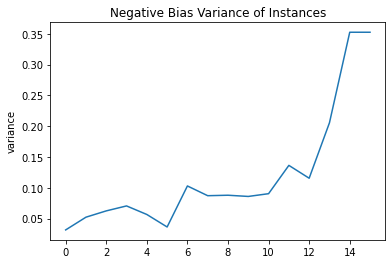

In [75]:
variance_df = pd.DataFrame(var_list).rename(columns={0:"variance"})
# display(variance_df)

# X-axis = number of clusters
sns.lineplot(data=variance_df, x=variance_df.index, y="variance", legend='auto').set_title('Negative Bias Variance of Instances')


## Condition 2. Affinity Propagation without errors as attribute


Affinity Propagation parameters:
* Damping:
* Maximum iterations:
* Convergence iterations:
* Preference
* Affinity: euclidean

In [7]:
from sklearn.cluster import AffinityPropagation
import numpy as np

In [12]:
# Fit Affinity Propagation with SciKit
afprop = AffinityPropagation(max_iter=100)
afprop.fit(features_i)
cluster_centers_indices = afprop.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)


# Predict the cluster for all the samples
P = afprop.predict(features_i)

P

In [37]:
var_list = []
features_i = features.copy(deep=True)
features["errors"] = errors
for n in range(2, 58):
    model = AffinityPropagation()
    affin = model(n_clusters=10, linkage='average', affinity='euclidean').fit_predict(features_i)
    features['cluster_results'] = pd.DataFrame(agglom.predict(features_i), index=features.index)
    neg_bias_list = []
    for i in features["cluster_results"].unique():
        neg_bias_list.append(bias_acc(features,i,"cluster_results"))
    var_list.append(neg_bias_list)
print(var_list)



AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [ ]:
var_list = []
features_i = features.copy(deep=True)
features["errors"] = errors
for n in range(2, 58):
    model = AffinityPropagation()
    affin = model(n_clusters=10, linkage='average', affinity='euclidean').fit_predict(features_i)
    features['cluster_results'] = pd.DataFrame(agglom.predict(features_i), index=features.index)
    neg_bias_list = []
    for i in features["cluster_results"].unique():
        neg_bias_list.append(bias_acc(features,i,"cluster_results"))
    var_list.append(neg_bias_list)
print(var_list)

## Condition 3. DBSCAN 

In [29]:
from sklearn.cluster import DBSCAN
import numpy as np

[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2]
[ 0 -1  1  2]
[ 0 -1  1  2]
[ 0 -1  1  2]
[ 0 -1  1  2]
[ 0 -1  1  2]
[ 0 -1  1  2]
[ 0 -1  1  2]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0  1 -1  2  3  4  5]
[ 0  1 -1  2  3  4  5]
[ 0  1 -1  2  3  4  5]
[ 0  1 -1  2  3  4  5]
[ 0  1 -1  2  3  4  5]
[ 0  1 -1  2  3  4  5]
[ 0  1 -1  2  3  4  5]
[ 0  1 -1  2  3  4  5  6]
[ 0  1 -1  2  3  4  5  6]
[ 0  1 -1  2  3  4  5  6]
[ 0  1 -1  2  3  4  5  6]
[ 0  1 -1  2  3  4  5  6]
[ 0  1 -1  2  3  

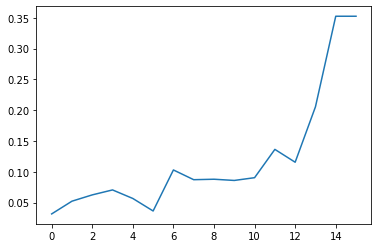

In [74]:
var_list = []
epsilon = 3
minimum_samples = 2
features_i = features.copy(deep=True)
features_i["errors"] = errors

for n in range(2, 58):
    model = DBSCAN(eps=epsilon, min_samples=minimum_samples).fit_predict(features_i)
    features_i['cluster_results'] = pd.DataFrame(model, index=features_i.index)
    #features['cluster_results'] = pd.DataFrame(DBSCAN.predict(features_i), index=features.index)
    neg_bias_list = []
    epsilon = epsilon-0.1
    if  len(features_i["cluster_results"].unique()) == 1:
        print("One cluster left on iteration ", n)
        print("With epsilon", epsilon)
        break
    for i in features_i["cluster_results"].unique():
        print(features_i["cluster_results"].unique())
        #print('features_i', features_i)
        neg_bias_list.append(bias_acc(features_i, i,"cluster_results"))
    var_list.append(np.var(neg_bias_list))
print(var_list)

plt.plot(var_list)


Text(0.5, 1.0, 'Negative Bias Variance of Instances')

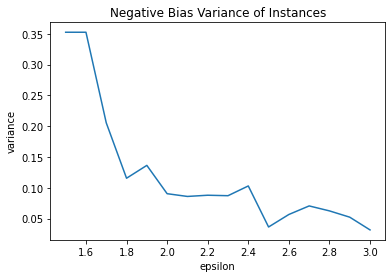

In [81]:
variance_df = pd.DataFrame(var_list).rename(columns={0:"variance"})
variance_df["epsilon"] = pd.DataFrame(np.arange(3.0, 1.3, -0.1))
# display(variance_df)

# X-axis = number of clusters
sns.lineplot(data=variance_df, x="epsilon", y="variance", legend='auto').set_title('Negative Bias Variance of Instances')
